In [120]:
#Importing necessary data visualization tools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [121]:
#loading data
df_ad = pd.DataFrame(pd.read_csv("advertising.csv"))
df_ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [122]:
df_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [123]:
df_ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [124]:
#chehcking for null values in the data set
df_ad.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Exploraratory Data Analysis (EDA)

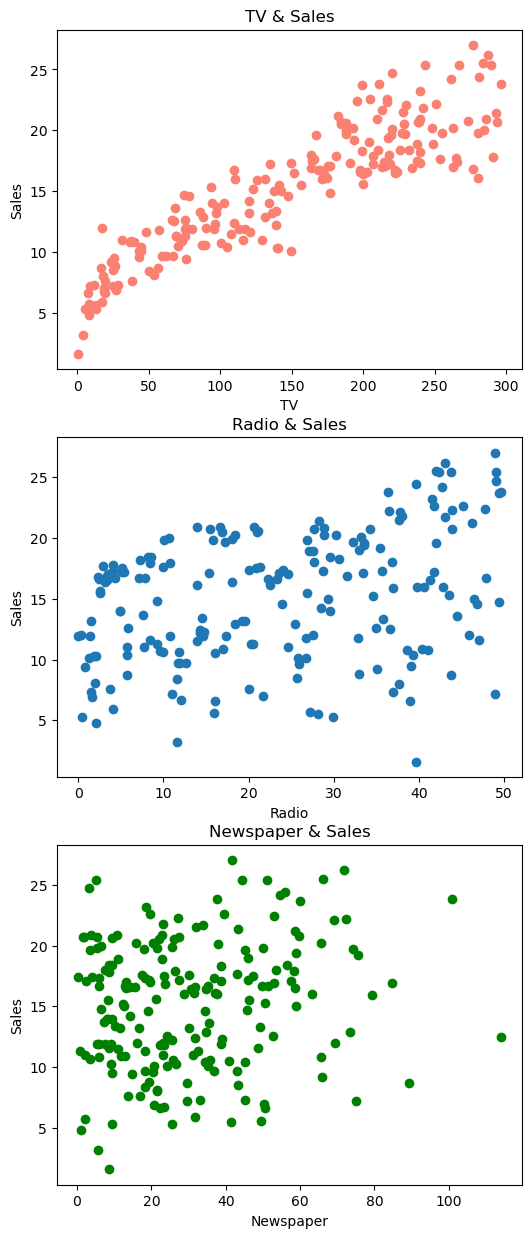

In [125]:
#Visualising scatter plots for the features(TV, Radio, Newspaper) vs Taregt(Sales)

fig, (ax0,ax1,ax2) = plt.subplots(nrows = 3, ncols = 1, figsize = (6,15))
scatter1 = ax0.scatter(df_ad["TV"],
                       df_ad["Sales"],
                       c = "salmon")

ax0.set(title = "TV & Sales",
        xlabel = "TV",
        ylabel = "Sales",
);

scatter2 = ax1.scatter(df_ad["Radio"],
                       df_ad["Sales"])

ax1.set(title = "Radio & Sales",
        xlabel = "Radio",
        ylabel = "Sales");

scatter3 = ax2.scatter(df_ad["Newspaper"],
                       df_ad["Sales"],
                       c = "green")

ax2.set(title = "Newspaper & Sales",
        xlabel = "Newspaper",
        ylabel = "Sales");



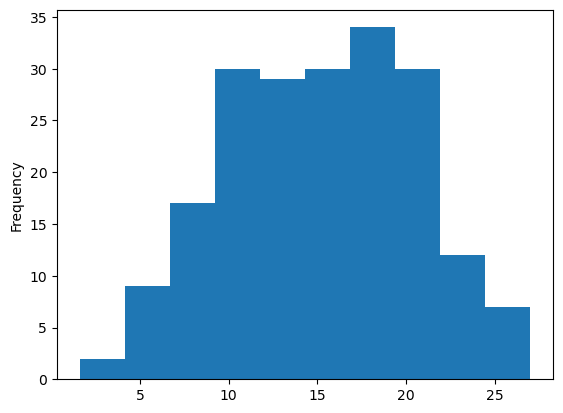

In [126]:
df_ad["Sales"].plot.hist();

In [127]:
#Getting the correlation matrix of features
df_ad.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


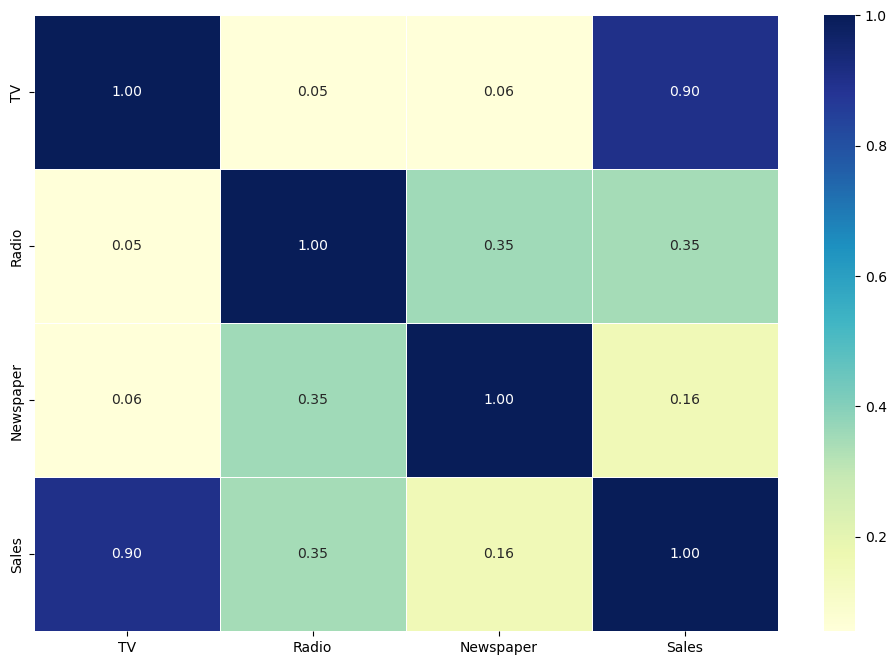

In [128]:
#Making it look better 
corr_matrix = df_ad.corr()
fig, ax = plt.subplots(figsize = (12,8))
ax = sns.heatmap(corr_matrix,
                annot = True,
                linewidth = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu")

## Modeling

#### Applying different regression models to find the best

In [50]:
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import f1_score, r2_score


**Going to use four different regression models for modeling**
   * Ridge()
   * KNeighborsRegressor()
   * RandomForestRegressor()
   * DecisionTreeRegressor()

In [132]:
#Splitting data into training and testing (Ratio- 80-20)

np.random.seed(11)
x = df_ad.drop("Sales", axis = 1)
y = df_ad["Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [133]:
#Making models dictionary 
models = {"KNN": KNeighborsRegressor(),
          "Random Forest": RandomForestRegressor(),
          "Ridge": Ridge(),
          "Decision Trees": DecisionTreeRegressor()
          }
    
np.random.seed(11)
model_scores = {}

def fit_and_score(models, x_train, x_test, y_train, y_test):
    
    for name,model in models.items():
        
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
        
    return model_scores


In [134]:
fit_and_score(models, x_train, x_test, y_train, y_test)

{'KNN': 0.9002823312685622,
 'Random Forest': 0.9541991186596472,
 'Ridge': 0.8899069236531756,
 'Decision Trees': 0.9357475185898554}

### Model Comparision

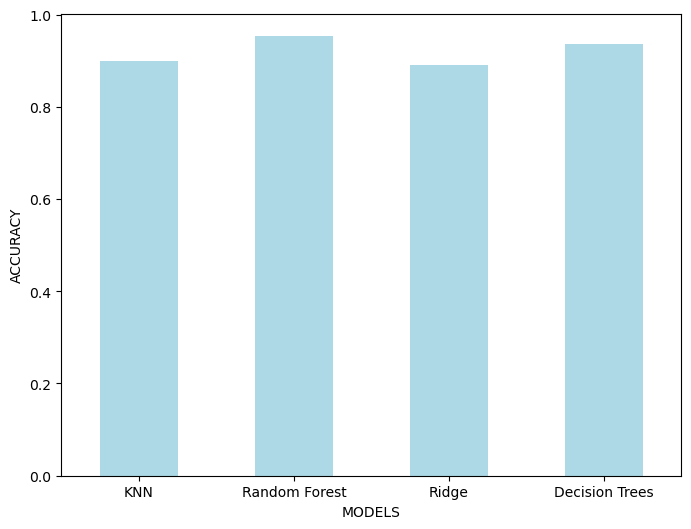

In [135]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot(kind = 'bar', color = 'lightblue', figsize = (8,6), legend=False)
plt.xlabel("MODELS")
plt.ylabel("ACCURACY")
plt.xticks(rotation = 0);

### HyperParameter Tuning

In [136]:
#Tuning KNN

train_scores = []
test_scores = []

#create a list of different values for n_neighbors
neighbors = range(1,21)

#KNN instance
knn = KNeighborsRegressor()

#loop through
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    #fit algorithm
    knn.fit(x_train, y_train)
    
    train_scores.append(knn.score(x_train, y_train))
    
    test_scores.append(knn.score(x_test, y_test))

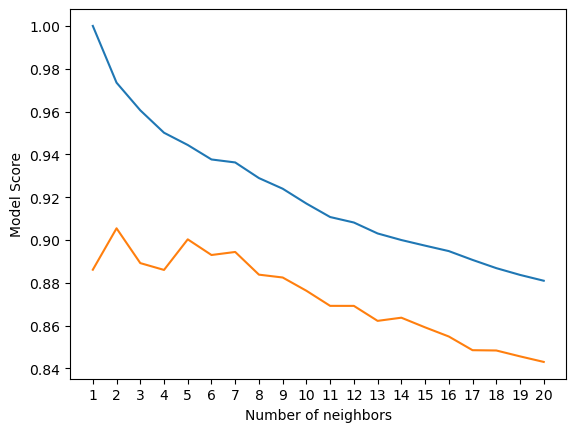

Maximum score on the test data: 90.54%


In [137]:
plt.plot(neighbors, train_scores, label = "Train Scores");
plt.plot(neighbors, test_scores, label = "Test Scores");
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.xticks(np.arange(1,21,1))
plt.show();
print(f"Maximum score on the test data: {max(test_scores)*100:.2f}%")

### HyperParameter tuning with RandomizedSearchCV

#### Going to tune 
* DecisionTreeRegressor()
* RandomForestClassifier()

Using RandomizedSearchCV

In [22]:
#create a hyperparamter grid for DecisionTreeRegressor
dt_grid = {"max_depth": [None,3,5,10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": ["auto", "sqrt", "log2"]}


#create a hyperparamter grid for RandomForestRegressor
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None,3],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}


In [118]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [138]:
#Tune DecisionTreeRegressor

np.random.seed(11)

#setup hyperparameter search model for DecisionTreeRegressor
rs_dt_reg = RandomizedSearchCV(DecisionTreeRegressor(),
                                param_distributions=dt_grid,
                                cv = 5,
                                n_iter=40,
                                verbose=True)

#fit random hyperparameter search model for DecisionTreeRegressor
rs_dt_reg.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=40,
                   param_distributions={'max_depth': [None, 3, 5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
                   verbose=True)

In [139]:
rs_dt_reg.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': None}

In [140]:
rs_dt_reg.score(x_test, y_test)

0.9065706259675916

In [141]:
#Tune RandomForestRegression

np.random.seed(11)

#setup hyperparameter search model for RandomForestRegression
rs_rf_reg = RandomizedSearchCV(RandomForestRegressor(),
                                param_distributions=rf_grid,
                                cv = 5,
                                n_iter=40,
                                verbose=True)

#fit random hyperparameter search model for RandomForestRegression
rs_rf_reg.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=40,
                   param_distributions={'max_depth': [None, 3],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [27]:
rs_rf_reg.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

In [28]:
rs_rf_reg.score(x_test, y_test)

0.946544509899515

### Evaluating our machine learning classifier 

##### Creating Evaluation metrics function

In [60]:
def show_scores(model):
    y_preds = model.predict(x_test)
    scores = {"MAE": mean_absolute_error(y_test, y_preds),
              "MSE": mean_squared_error(y_test, y_preds),
              "R^2": r2_score(y_test, y_preds)}
    return scores

In [71]:
# Metric scores for RandomForestRegressor() model
show_scores(rs_rf_reg)

{'MAE': 0.8752500000000009,
 'MSE': 1.5211130555555576,
 'R^2': 0.946544509899515}

In [82]:
# Metric scores for DecisionTreeRegressor() model
show_scores(rs_dt_reg)

{'MAE': 1.1625810786435788,
 'MSE': 2.448332662962663,
 'R^2': 0.9139598322756526}

#### Getting the Feature Importances

In [93]:
rs_rf_reg.best_estimator_.feature_importances_

array([0.8499253 , 0.13709151, 0.01298319])

In [112]:
def plot_features(columns, importances, n=20):
    
    df = (pd.DataFrame({"features": columns, 
                        "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    fig, ax = plt.subplots()
    ax.bar(df["features"][:n], df["feature_importances"][:20])
    ax.set_xlabel("Feature Importances")
    ax.set_ylabel("Features")

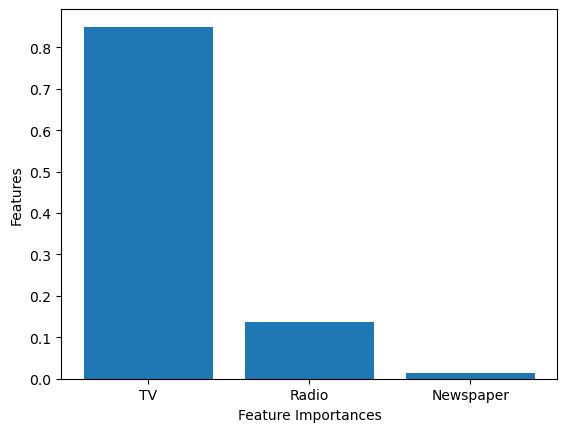

In [113]:
plot_features(x_train.columns, rs_rf_reg.best_estimator_.feature_importances_)